### Exploratory data analysis
I will investigate Medicare hospital mesaures with respect to the summary star ratings (SSR) comptued from the patient surveys. Some of the questions that I try to answer are as follows:
1. How are the ratings distributed? What is the most frequent rating?
2. How are the medicate hospitals distributed throughout the US? Where are the most concentration of hospitals?
3. Is there a noticeable difference summary star ratings per state?
4. Considering the reported national level measures, do hospitals with higher national average scores, receive higher summary star ratings?
5. Do hospitals that received better results on the numerical measures generally ranked higher?
6. Can we find any correlation among the SSRs and the reported measures?


In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# Import data
d = os.path.dirname(os.getcwd())
data_file = os.path.join(d, 'data','interim','hospitals_clean.csv')
df_hospital = pd.read_csv(data_file)

# View first lines of data
df_hospital.head(n=4)

,Provider ID,Hospital Name,Summary star rating,ZIP Code,City,State,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,...,SM_PART_NURSE,OP_17,SM_PART_GEN_SURG,SM_SS_CHECK,OP_25,OP_20,OP_21,OP_22,OP_5,OP_4
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,3,36301,DOTHAN,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,...,Y,No,N,Y,Yes,59.0,96.0,5.0,NaN,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,4,35957,BOAZ,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,...,N,Yes,N,Y,Yes,23.0,67.0,2.0,14.0,98.0
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,3,35631,FLORENCE,AL,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,...,N,Yes,N,Y,Yes,13.0,70.0,1.0,NaN,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,4,36467,OPP,AL,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,...,N,Yes,N,Y,Yes,40.0,62.0,2.0,7.0,100.0


In [3]:
# To understand the meaning of the documentation please refer to the accompanying pdf
# check the info for types and missing values
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3490 entries, 0 to 3489
Data columns (total 69 columns):
Provider ID                                             3490 non-null int64
Hospital Name                                           3490 non-null object
Summary star rating                                     3490 non-null int64
ZIP Code                                                3490 non-null int64
City                                                    3490 non-null object
State                                                   3490 non-null object
Hospital Type                                           3490 non-null object
Hospital Ownership                                      3490 non-null object
Emergency Services                                      3490 non-null object
Meets criteria for meaningful use of EHRs               3464 non-null object
Mortality national comparison                           3110 non-null object
Safety of care national comparison               

Number of Hospitals: 3490
3    1380
4    1335
2     525
5     195
1      55
Name: Summary star rating, dtype: int64
Mean hospital rating 3.312


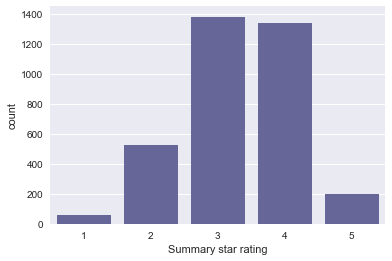

In [4]:
# Bar plot the 'Summary star rating' to get the distribution of the ratings
sns.countplot(x='Summary star rating', color="blue", saturation=.2, data=df_hospital)
hospital_numbers = len(df_hospital)
print('Number of Hospitals:', hospital_numbers)
print(df_hospital['Summary star rating'].value_counts())
print('Mean hospital rating %.3f' % (np.mean(df_hospital['Summary star rating'].values)))

From the above ratings we understand that most hospitals received either 3 or 4 rankings with the averge rating lying at 3.31

In [5]:
# Create a Choropleth map which provides a nice visualization of the US map where values of interestest can be colorcoded
# and over laid on the state

# create the new dataframe to be used in the Choropleth map
# the new df2 dataframe contains the hospital state and the number of hospitals for each SSR in one row
df = df_hospital[['Summary star rating','State']]
sr = df.groupby('State')['Summary star rating'].value_counts()
df2 = sr.unstack(level=-1)
df2.columns = ['one','two','three','four','five']
df2.reset_index(inplace=True)
df2.fillna(0, inplace = True)
df2.info()
df2['count'] = df2.sum(axis=1)
df2['mean star'] = (df2['one']*1 + df2['two']*2 + df2['three']*3 + df2['four']*4 + df2['five']*5)/df2['count']
df2
#print(sum(df2['count']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
State    52 non-null object
one      52 non-null float64
two      52 non-null float64
three    52 non-null float64
four     52 non-null float64
five     52 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


,State,one,two,three,four,five,count,mean star
0,AK,0.0,1.0,6.0,3.0,1.0,11.0,3.363636
1,AL,0.0,4.0,36.0,31.0,2.0,73.0,3.424658
2,AR,1.0,6.0,21.0,18.0,2.0,48.0,3.291667
3,AZ,0.0,23.0,27.0,11.0,2.0,63.0,2.873016
4,CA,20.0,110.0,122.0,39.0,6.0,297.0,2.666667
5,CO,0.0,1.0,17.0,31.0,6.0,55.0,3.763636
6,CT,0.0,3.0,16.0,8.0,0.0,27.0,3.185185
7,DC,3.0,3.0,1.0,0.0,0.0,7.0,1.714286
8,DE,0.0,0.0,4.0,2.0,0.0,6.0,3.333333
9,FL,4.0,71.0,59.0,31.0,1.0,166.0,2.722892


In [6]:
# Creat a chorepleth plot that demonstrates the concentration of the hospitals with the star rating for each state
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

for col in df2.columns:
    df2[col] = df2[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
    
df2['text'] = df2['State'] + '<br>' +\
    'one: '+df2['one']+' two: '+df2['two']+'<br>'+\
    'three: '+df2['three']+' four: ' + df2['four']+'<br>'+\
    'five: '+df2['five']

data = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df2['State'],
        z = df2['count'].astype(float),
        locationmode = 'USA-states',
        text = df2['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Hospitals")
        ) 

layout = dict(
        title = 'Medicare hospitals distribution',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)


From the above plot we see that the most concentraion of the hospitals are in California and Texas. It would be interesting to compare the summary star ratings in these two states visually.

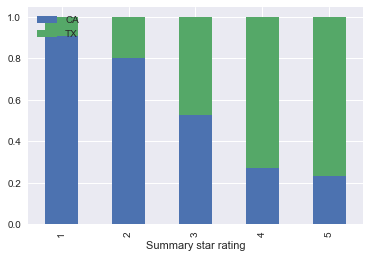

In [7]:
# Compare star ratings in Texas and California (data has been noralized to enable comparison)
df = df_hospital[(df_hospital['State'] == 'CA') | (df_hospital['State'] == 'TX')]
#sns.factorplot(x='Summary star rating', color="blue", col = 'State', kind = 'count', saturation=.2, data=df)
df.groupby('Summary star rating')["State"].\
                   value_counts(normalize=True).unstack().plot.bar(stacked=True, legend=False)
plt.legend(loc='upper left')

We notice that Texas has more higher rated (rates 4 and 5) hospital rates than California. Further analysis is needed to understand what measures are driving these results.

In [8]:
# Create another Choropleth that depicts the averege star ratings per state 
data = dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df2['State'],
        #z = df2['count'].astype(float),
        z = df2['mean star'].astype(float),
        locationmode = 'USA-states',
        text = "",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Hospitals")
        ) 

layout = dict(
        title = 'Mean star ratings by state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

We see that thereseems to be generally higher ranking in less populated states (or lower denisity). US population data could be used here to further investigate this outcome.

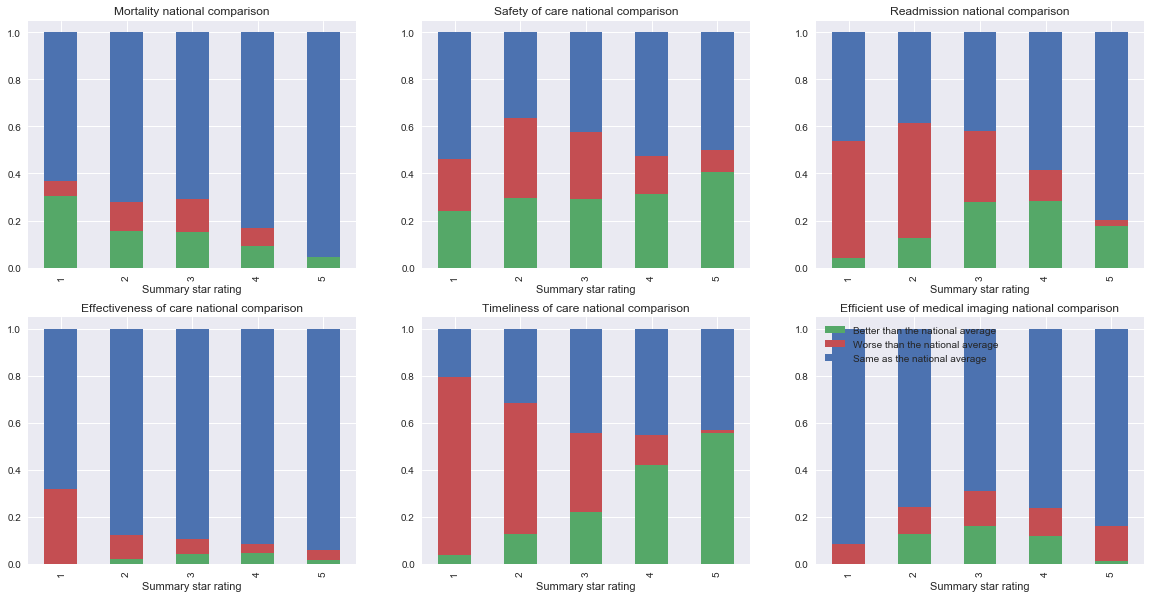

In [9]:
# Do a percentage stacked bar plot on national level measures
df_hospital_less = df_hospital.iloc[:,:16]
nationalMeasures = df_hospital_less.columns[10:]

fig, axes = plt.subplots(nrows=2, ncols=3)
current_palette = sns.color_palette()
for index,measure in enumerate(nationalMeasures): 
    i = int(index / 3)
    j = int(index % 3) 
    df_hospital_less.groupby('Summary star rating')[measure].\
                   value_counts(normalize=True).unstack().plot.bar(stacked=True, ax=axes[i,j], figsize=(20, 10),\
                   title = measure, legend=False, color= [current_palette[1],current_palette[2],current_palette[0]])
    
plt.legend(('Better than the national average', 'Worse than the national average', 'Same as the national average'), loc='upper left')
plt.show()

The above bar plots demonstrate the distribution of the hospitals grouped by their SSR and further divided into three categories based on their national measure performance. These are catogorical measures and the values reported can take one of three values, namely, better than the national average, worse than the national average, and same as the national average. We observe that generally the proportion of the 'better than national' hospitals is higher in higher rated hospitals. This trend is noticeably visible when we look at the 'Timeliness of care national comparision' measure, indicating that lower time to care is an influential measure in the hospital ratings. Considering 'Mortality national comparison' we do not observe the same general trend as in the other plots, green bars are decreasing, however we still notice that worse perfromance meaures are decreasing (red bars). Summing up all these measures to generate one representiative plot (see below) the trends in the green, red, and blue bar colors is generally what we expect.

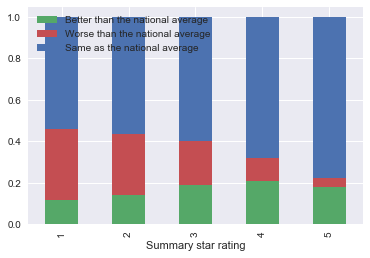

In [10]:
# Do an aggregate percentage stacked bar plot considering all the national level measures
df = df_hospital_less.groupby('Summary star rating')["Mortality national comparison"].\
                   value_counts().unstack()
df.fillna(0, inplace=True)

for measure in nationalMeasures[1:]: 
    df_tmp = df_hospital_less.groupby('Summary star rating')[measure].\
                   value_counts().unstack()
    df_tmp.fillna(0, inplace=True)
    df= df.add(df_tmp, axis = 'column')

# Convert to percentage
df.columns.name = ''
cols = df.columns
df[cols].sum(axis=1)
df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0)
df.plot.bar(stacked=True, color= [current_palette[1],current_palette[2],current_palette[0]])
plt.legend(('Better than the national average', 'Worse than the national average', 'Same as the national average'), loc='upper left')



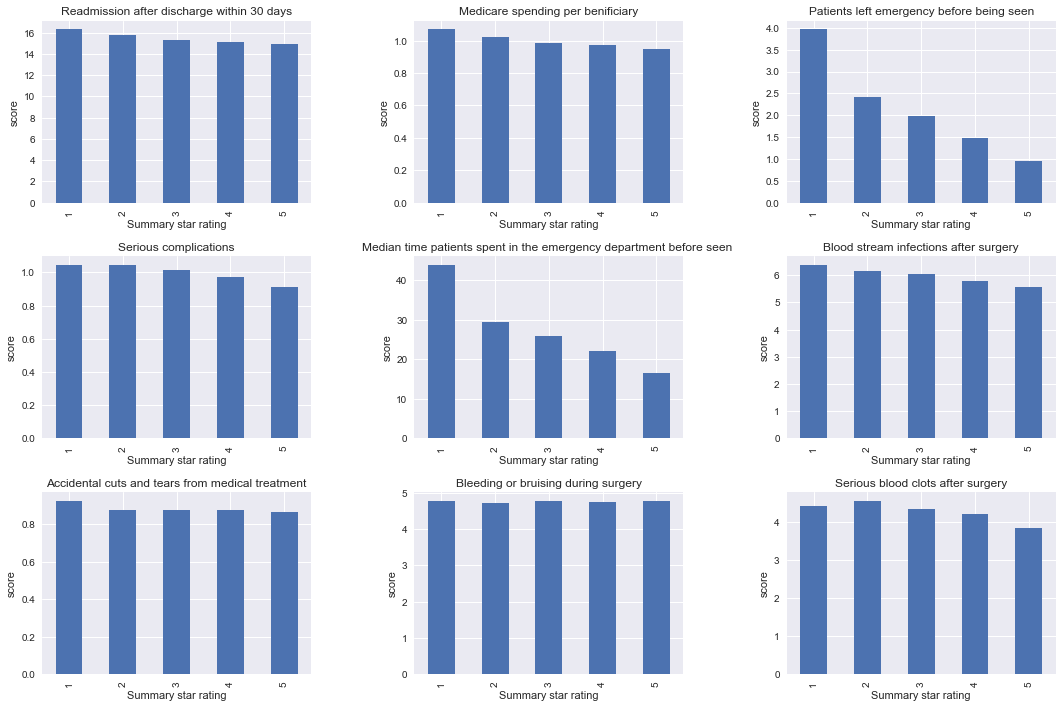

In [11]:
# Look more closely into some interesting measures
# Examine how this varies for each star rating

interesting_measures = ['READM_30_HOSP_WIDE', 'MSPB_1', 'OP_22', 'PSI_90_SAFETY', 'OP_20', 'PSI_13_POST_SEPSIS',\
                        'PSI_15_ACC_LAC','PSI_9_POST_HEM', 'PSI_12_POSTOP_PULMEMB_DVT']
titles = ['Readmission after discharge within 30 days', 'Medicare spending per benificiary',\
          'Patients left emergency before being seen', 'Serious complications', \
          'Median time patients spent in the emergency department before seen ', \
          'Blood stream infections after surgery', 'Accidental cuts and tears from medical treatment',\
          'Bleeding or bruising during surgery', 'Serious blood clots after surgery']

n = 3
fig, axes = plt.subplots(nrows=n, ncols=n)
for index, measure in enumerate(interesting_measures):
    i = int(index / n)
    j = int(index % n)
    ax = df_hospital.groupby('Summary star rating')[measure].\
                   mean().plot.bar(title=titles[index], ax= axes[i,j], figsize=(15,10))
    ax.set_ylabel('score')

fig.tight_layout()

Above bar plots demonstrate the variations of the star ratings with respect to 9 numerical measures. I handpicked these measures among others as I thought they would be interesting for a visual presentation. The values for the numerical measures are reported under the column name 'score' in the csv files. But it should not be confused with the general notion of score, i.e. the higher the better. In the above depicted measures a lower value, in fact a lower score is a better value. I kept the score terminology in order to be consistent with the files. We again observe measures related to time to care present themselves visbly in the ratings. 

Acute Care Hospitals         3027
Critical Access Hospitals     463
Name: Hospital Type, dtype: int64


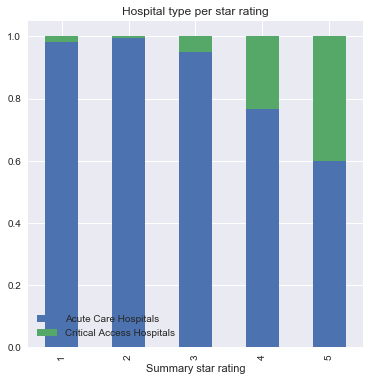

In [12]:
print(df_hospital['Hospital Type'].value_counts())
df_hospital.groupby('Summary star rating')['Hospital Type'].\
                   value_counts(normalize=True).unstack().plot.bar(stacked=True, figsize=(6, 6),\
                   title = 'Hospital type per star rating', legend=False)
plt.legend()

The Medicare hospitals are either acute care hospitals or critical access hospitals. We notice that acute care hospitls always have the higher proportion of each summary star rating. However, it is interesting to also observe that critical access hospitals are more concentrated around the higher ranks (4 and 5).

Voluntary non-profit - Private                 1563
Proprietary                                     649
Voluntary non-profit - Other                    378
Voluntary non-profit - Church                   295
Government - Hospital District or Authority     282
Government - Local                              213
Physician                                        50
Government - State                               41
Government - Federal                             16
Tribal                                            3
Name: Hospital Ownership, dtype: int64


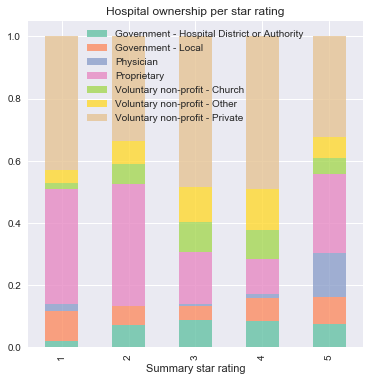

In [13]:
# Bar plots on hospital ownership
#sns.countplot(x='Hospital Ownership', color="blue", saturation=.2, data=df_hospital)
print(df_hospital['Hospital Ownership'].value_counts())

df = df_hospital[(df_hospital['Hospital Ownership'] != 'Tribal') & (df_hospital['Hospital Ownership'] != 'Government - State')&\
                 (df_hospital['Hospital Ownership'] != 'Government - Federal')]

df.groupby('Summary star rating')['Hospital Ownership'].\
                   value_counts(normalize=True).unstack().plot.bar(stacked=True, figsize=(6, 6),\
                   title = 'Hospital ownership per star rating', legend=False, color=sns.color_palette("Set2", 7), alpha=0.8)
plt.legend()

I furhter explored the hospitals with respect to their type of ownerships. Medicare hospitals report 9 different types of ownership, 7 of which are shown in the plot. We observe that physician hospitals are generraly rated high.

In [14]:
# Move around some columns
cols = df_hospital.columns.tolist()
cols = cols[:16] + cols[-11:-5] + cols[16:-11] + cols[-5:]
df_hospital = df_hospital.reindex(columns=cols)

# Drop provider ID and hospital Name
df_hospital.drop(['Provider ID', 'Hospital Name', 'ZIP Code', 'City'], inplace = True, axis=1)

Finally I will explore the correlations between the numerical measures in the dataframe the the seaborn heatmap plot.  

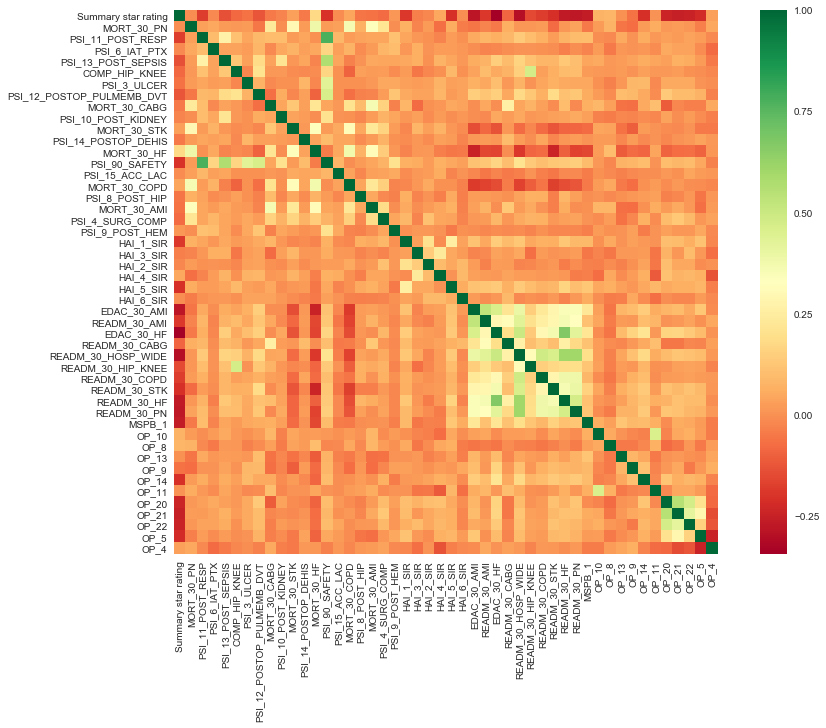

In [27]:
# Scatter plot
y = df_hospital['Summary star rating']
df_measures = df_hospital.iloc[:,18:]
plt.figure(figsize = (15,10))
sns.heatmap(df_hospital.corr(), square = True, cmap='RdYlGn')
plt.show()

In the above scatter plot green indicates positive and red indicates negative correlation. Among the meaures where we notice a negative mild correlation with the SSR is 'PSI_90_Safety' which indicates serious complications. In other words, the higher the complications rate the lower the rating. Another interesting meaure where we see a negative correlation with the rating is the 'READM_30_Hosp_Wide'. The higher the readmission the lower the SSR. Another interesting feature is the 'MSBP_1' that indicates Medicare sepnding per beneficiary that is negatively correlated with the SSR, which was also demonstrated with the bar pplots earlier. We also notice the impact of time-related measures (ex. OP_21 and OP_22) that are negatiely correated with the SSR. 
For further information regarding the description of the measures please refer to the pdf file.

In [29]:
# Doing some descriptive analysis
df_hospital.describe()

,Summary star rating,MORT_30_PN,PSI_11_POST_RESP,PSI_6_IAT_PTX,PSI_13_POST_SEPSIS,COMP_HIP_KNEE,PSI_3_ULCER,PSI_12_POSTOP_PULMEMB_DVT,MORT_30_CABG,PSI_10_POST_KIDNEY,...,OP_8,OP_13,OP_9,OP_14,OP_11,OP_20,OP_21,OP_22,OP_5,OP_4
count,3490.000000,3297.000000,2655.000000,3012.000000,2653.000000,2697.000000,3002.000000,2909.000000,1031.000000,2680.000000,...,1524.000000,2240.000000,2857.000000,2431.000000,3062.000000,3184.000000,3114.000000,3076.000000,2142.000000,2104.000000
mean,3.312321,15.977555,12.114712,0.397912,5.974964,2.805599,0.248571,4.303854,3.271387,1.119444,...,40.400000,4.657857,8.950053,1.360058,2.467080,25.034862,51.811818,1.867360,8.151727,95.483365
std,0.849792,2.012173,3.740351,0.062267,1.123186,0.536317,0.266419,1.071879,0.887861,0.146258,...,7.111137,1.962614,5.535735,0.963518,4.532315,15.369234,17.811986,1.782652,5.280267,5.828073
min,1.000000,9.300000,2.580000,0.210000,1.860000,1.400000,0.030000,1.720000,1.300000,0.590000,...,17.900000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,32.000000
25%,3.000000,14.600000,9.720000,0.360000,5.380000,2.500000,0.130000,3.680000,2.650000,1.067500,...,35.600000,3.400000,6.100000,0.800000,0.000000,15.000000,39.000000,1.000000,5.000000,94.000000
50%,3.000000,15.800000,11.400000,0.390000,5.770000,2.700000,0.190000,4.140000,3.100000,1.100000,...,40.200000,4.600000,7.900000,1.200000,0.700000,22.000000,50.000000,1.000000,7.000000,97.000000
75%,4.000000,17.200000,13.975000,0.420000,6.460000,3.100000,0.240000,4.750000,3.800000,1.120000,...,44.400000,5.700000,10.300000,1.700000,2.700000,31.000000,62.000000,3.000000,10.000000,100.000000
max,5.000000,24.900000,37.990000,0.840000,12.210000,5.600000,3.760000,10.960000,7.400000,2.050000,...,66.200000,14.900000,70.500000,11.400000,52.600000,158.000000,151.000000,29.000000,106.000000,100.000000


### Conclusion
we noticed that most of the Medicare hospital ratings are either 3 or 4, which is reflective of the human ranked processed where extreme values are rare. We also observed that there is generally an agreement between the hispital ratings and the value of the reported measures in terms of plausibility, meaning that if a hospital has received a positive value on a measure they have also received a higher star rating. Among these measures that have an indication of time (ex. average time patient had to wait before initial examiniation) have normally a noticeable impact on the star ratings and was seen in the bar plots and the correlation plot. Additionally, from the above descriptive analysis we understand that there are some higher max values for the aformentioned time-related measures. It would be interesting to investigate this further to see if there would be any relation among these measures andh the location (city, state) of the hospital. Generally, reducing the time to treatment can be an important factor in getting a better rating from the patients.

In [25]:
# Write the transformed dataframe into file
d = os.path.dirname(os.getcwd())
data_file = os.path.join(d, 'data','processed','hospitals_clean_reordered.csv')
df_hospital.to_csv(data_file, encoding='utf-8', index=False)